<a href="https://colab.research.google.com/github/rama96/hugging-face/blob/master/Chapter_3_Transformers_Anatomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.1 MB/s 
     |████████████████████████████████| 120 kB 44.4 MB/s 
     |████████████████████████████████| 6.6 MB 28.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 6.1 MB/s 
     |████████████████████████████████| 212 kB 52.0 MB/s 
     |████████████████████████████████| 115 kB 44.1 MB/s 
     |████████████████████████████████| 127 kB 43.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


# Chapter 3 - Transformer Anatomy

 **Encoder** - Converts an input sequence of tokens into a sequence of embedding vectors, often called the hidden state or context

**Decoder** - Uses the encoder’s hidden state to iteratively generate an output sequence of tokens, one token at a time.

**positional_embeddings** - Contains information about token positions into the input to model the sequential nature of text.


The encoder’s output is fed to each decoder layer, and the decoder then generates a prediction for the most probable next token in the sequence. The output of this step is then fed back into the decoder to generate the next token, and so on until a special end-of- sequence (EOS) token is reached.

## **Different Types of Models**

### **Encoder-only :**

These models convert an input sequence of text into a rich numerical representation that is well suited for tasks like text classification or named entity recognition. **BERT** and its variants, like RoBERTa and DistilBERT, belong to this class of architectures.

The representation computed for a given token in this architecture depends both on the left (before the token) and the right (after the token) contexts. This is often called bidirectional attention.

### Decoder**-only :**

These models will auto-complete the sequence by iteratively predicting the most probable next word. The family of **GPT** models belong to this class. The representation computed for a given token in this architecture depends only on the left context. This is often called causal or autoregressive attention.

### Encoder-decoder :

Complex mappings from one sequence of text to another; they’re suitable for machine translation and summarisation tasks. In addition to the Transformer architecture, which as we’ve seen combines an encoder and a decoder, the BART and T5 models belong to this class.

## **Encoder Architecture :**

Each encoder layer receives a sequence of embeddings and feeds them through the following sublayers:

- A multi-head self-attention layer
- A fully connected feed-forward layer that is applied to each input embedding

Fig1 Encoder Overview

Fig 2 . AndrewNg Attention Model Overview

Fig 3 . AndrewNg Encoder Model to generate context

## Self-Attention

Attention is a mechanism that allows neural networks to assign a different amount of weight or “attention” to each element in a sequence.

In BERT each token is represented as a 768-dimensional vector . → embedding factors = 768

The main idea behind self-attention is that instead of using a fixed embedding for each token, we can use the whole sequence to compute a weighted average of each embedding. Another way to formulate this is to say that given a sequence of token embeddings ${x}_{1}$ , ${x}_{2}$ … ${x}_{n}$, self-attention produces a sequence of new embeddings ${x}^{`}_{1}$ ,${x}^{`}_{2}$… ${x}^{`}_{n}$ where each is a linear combination of all the ${x}_{j}$:

${x}^`_{i} = \sum_{j}{w}_{ij}{v}_{j}$

The new ${x}^{`}_{i}$ is same as context from Fig3 . $α$ is same as $w$ in this case . They are called attention weights . 

$\displaystyle\sum_{i = 1}^{n} α^{<t,i>} = \displaystyle\sum_{j = 1}^{n} w_{i,j} = 1$

This helps model give context to different embeddings of words . Ex: consider what comes to mind when you see the word “flies”. You might think of annoying insects, but if you were given more context, like “time flies like an arrow”, then you would realize that “flies” refers to the verb instead. Similarly, we can create a representation for “flies” that incorporates this context by combining all the token embeddings in different proportions, perhaps by assigning a larger weight to the token embeddings for “time” and “arrow”

Embeddings that are generated in this way are called contextualized embeddings and predate the invention of transformers in language models like ELMo.2


## Scalar Dot product Attention

1. Embedding → ***query , key , value***
2. Attention scores between query and key → $n * n$  martix of attention scores . In this case ,it’s just the dot product between query and key . 
3. Compute weights from attention scores . Normalize the matrix and apply softmax to ensure that they add up to 1 . → $n * n$   attention weights ${w}_{ij}$.
4. Update the token embeddings as ${x}^`_{i} = \sum_{j}{w}_{ij}{v}_{j}$ where v is the value vector .

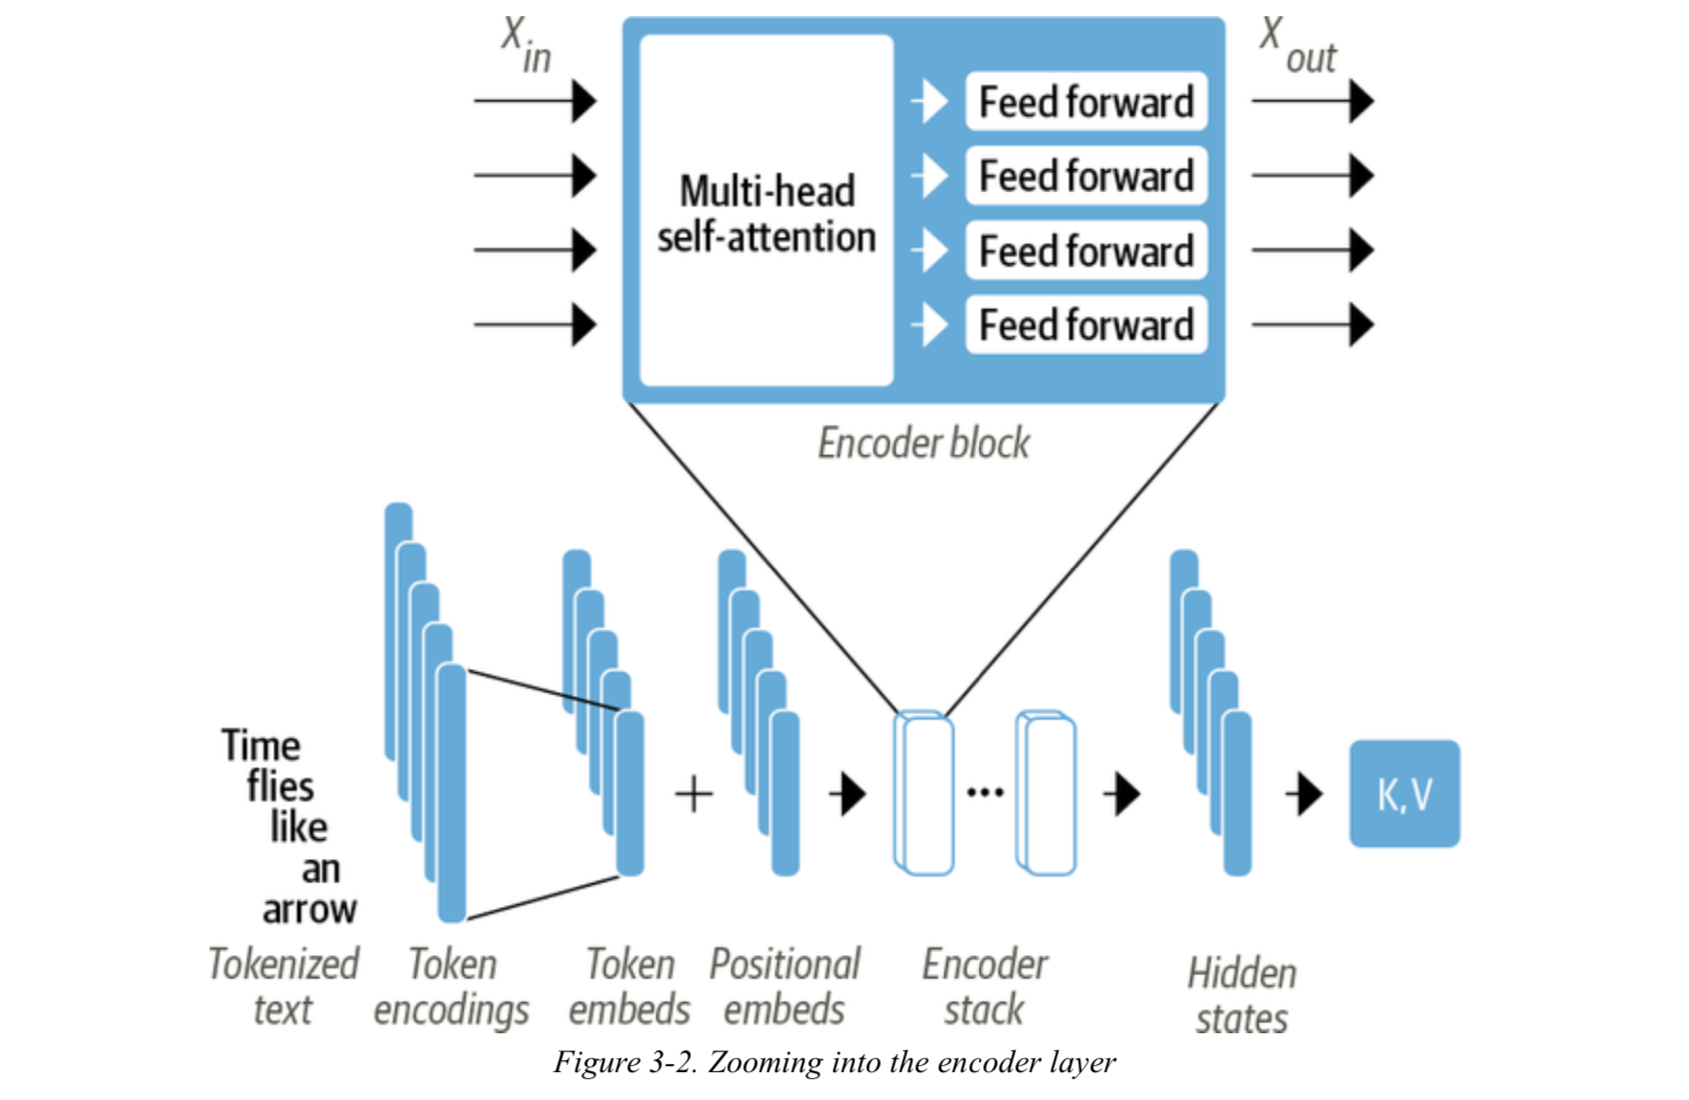

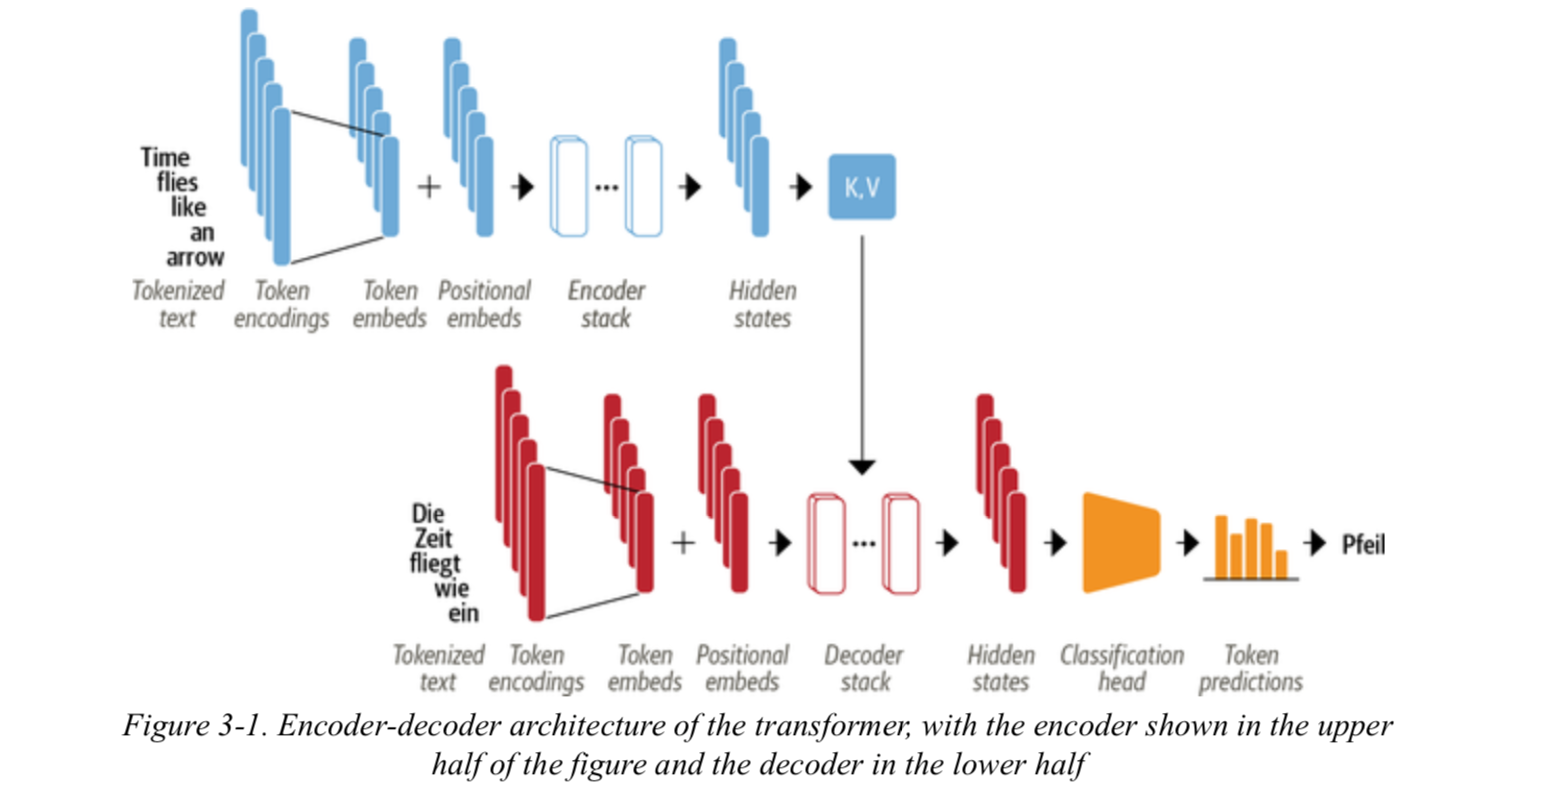

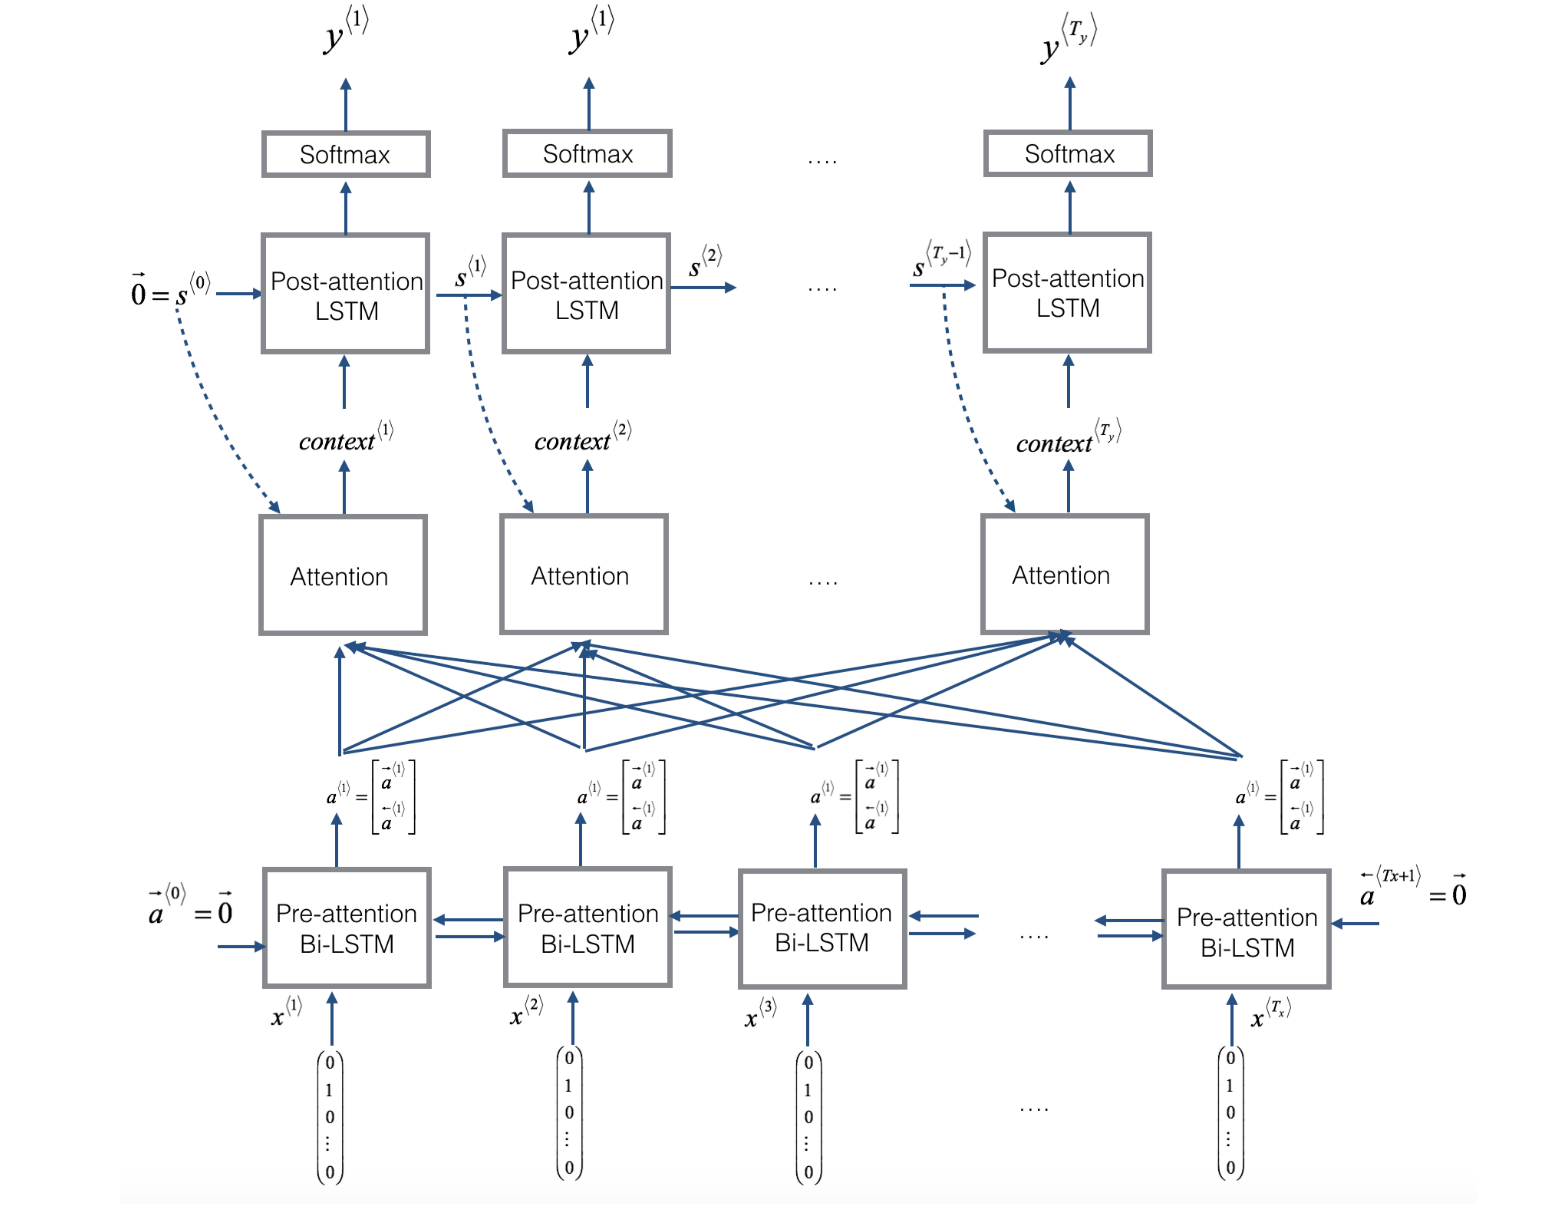

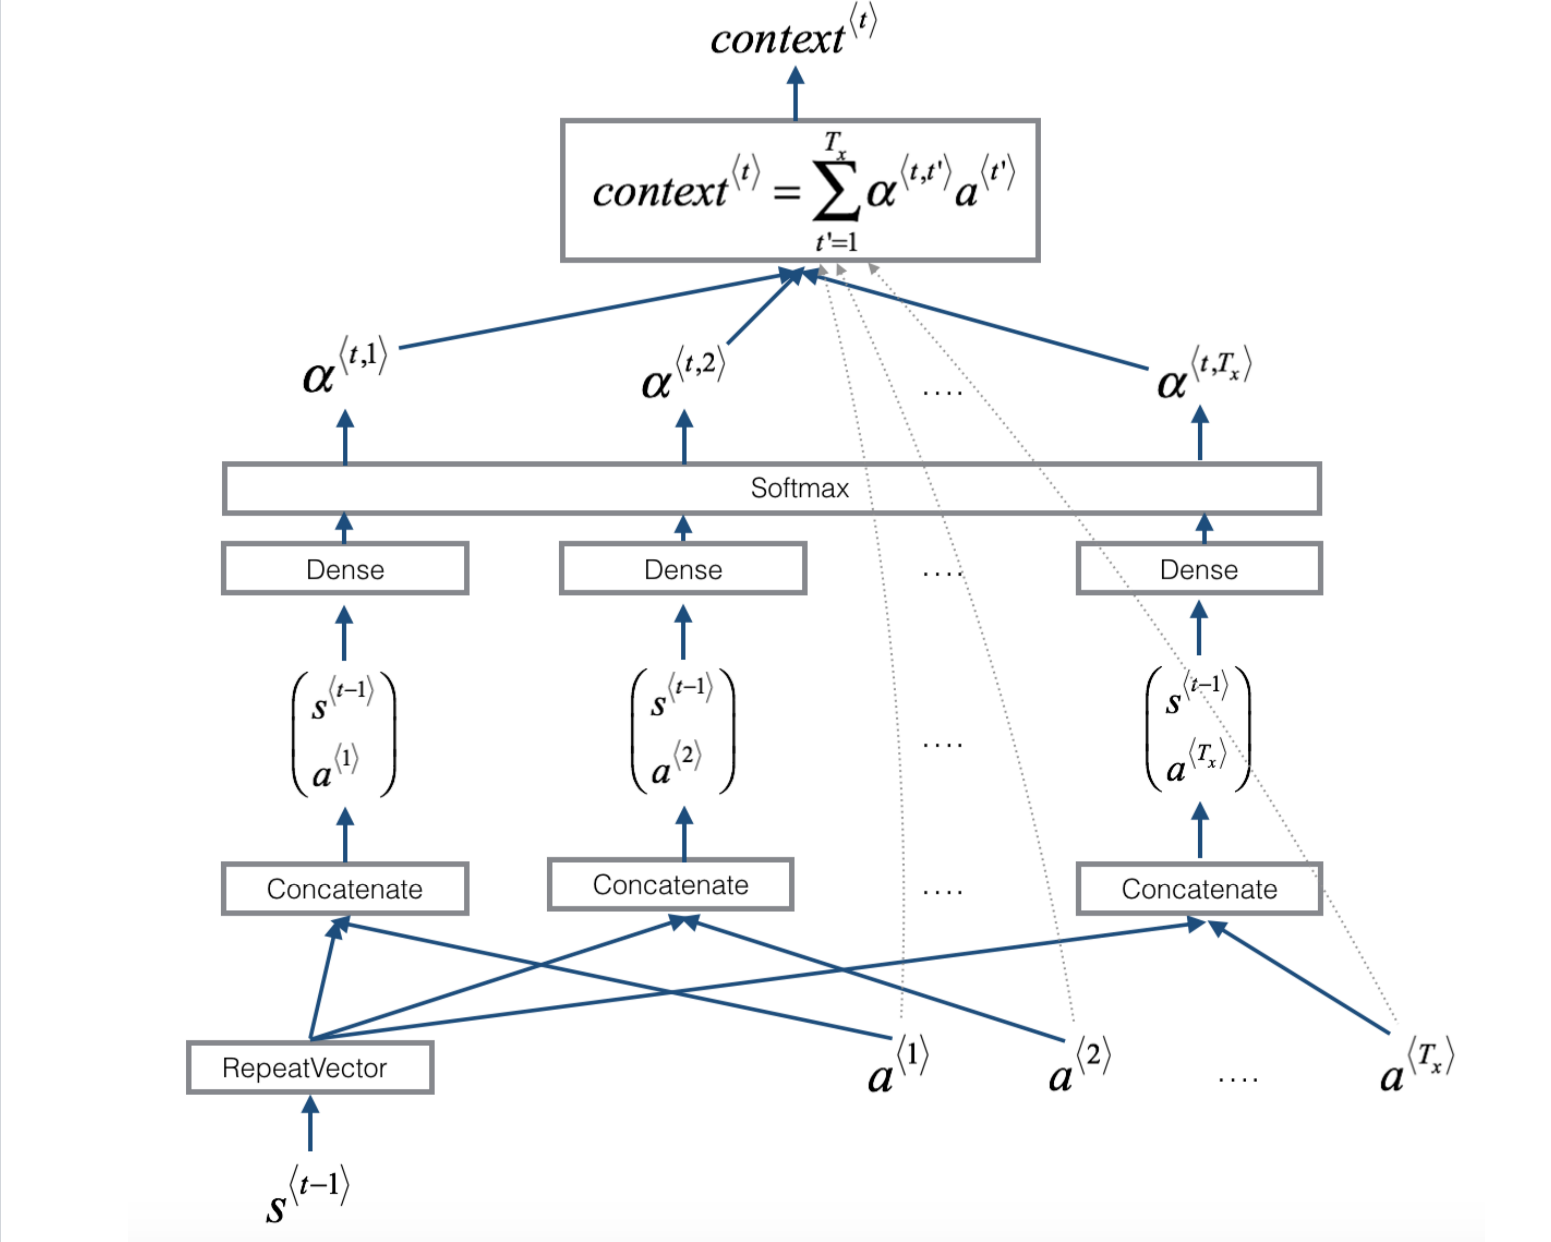

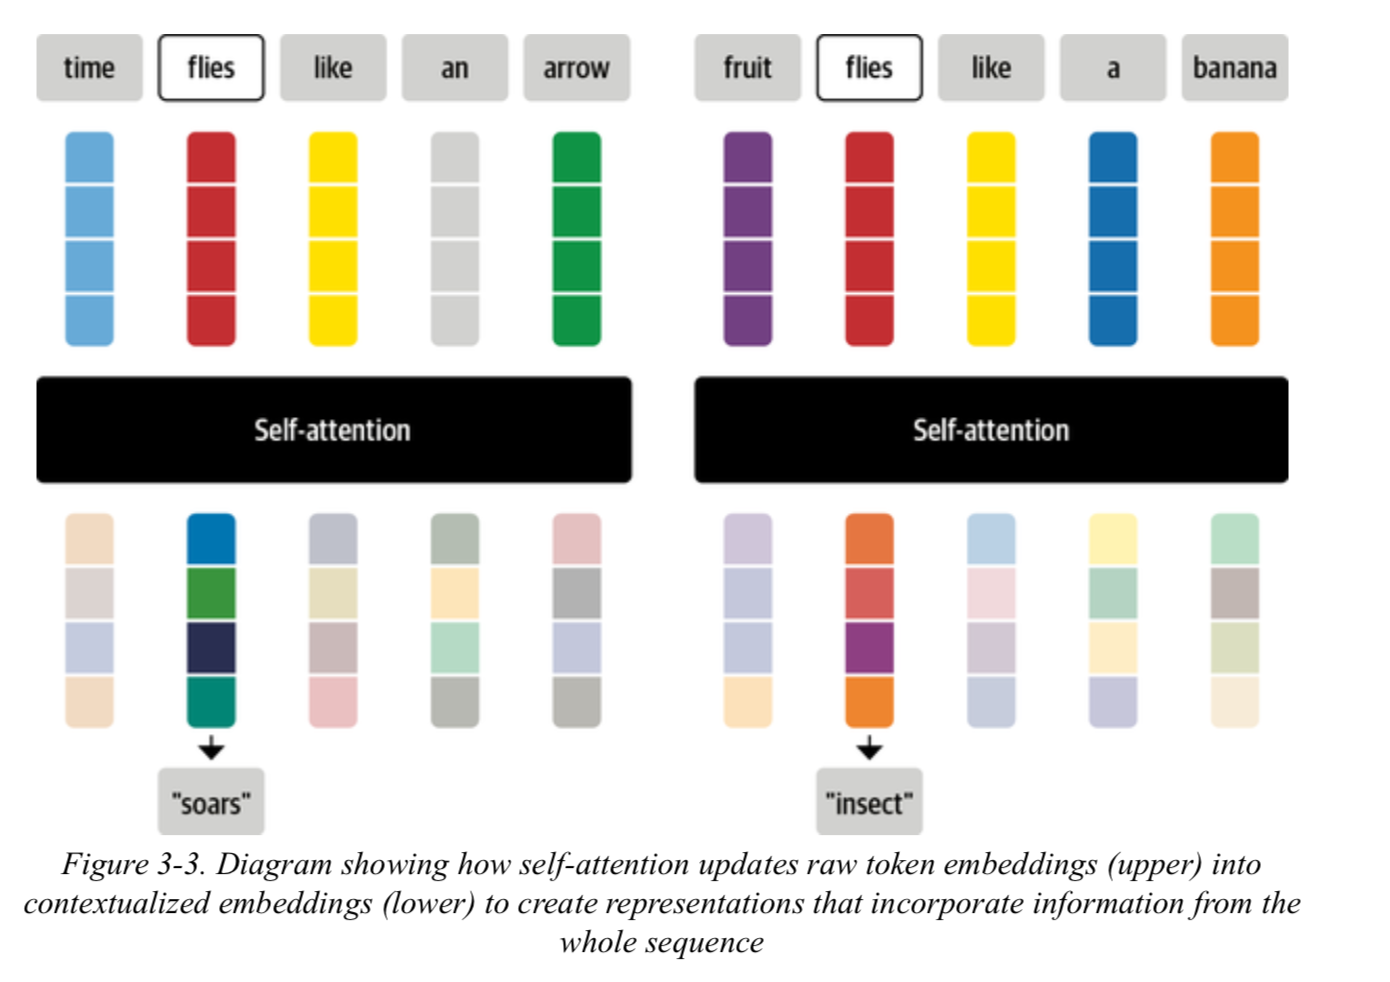

In [3]:
!pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 157 kB 5.4 MB/s 
     |████████████████████████████████| 1.3 MB 27.0 MB/s 
     |████████████████████████████████| 132 kB 44.6 MB/s 
     |████████████████████████████████| 9.1 MB 30.9 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 


In [5]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

In [6]:
model_ckpt="bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BertModel.from_pretrained(model_ckpt)


100%|██████████| 440473133/440473133 [00:19<00:00, 22525790.43B/s]


In [7]:
text = "time flies like an arrow"
show(model,
     "bert",
     tokenizer,
     text , 
     display_mode="light",
     layer=0,
     head=8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

flies -> is strongly linked with arrow .  

Scalar dot product in self attention

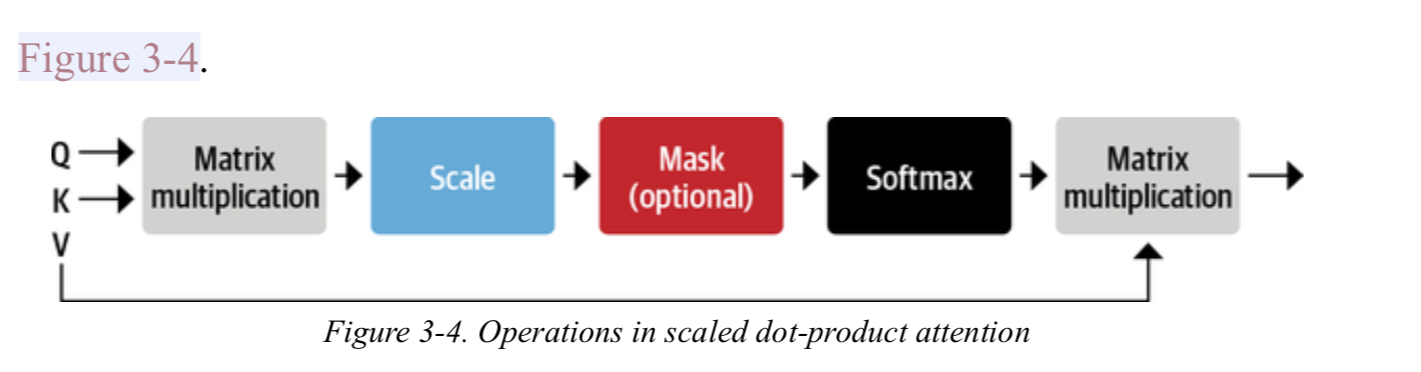

In [9]:
inputs = tokenizer(text , 
                   return_tensors="pt", # pytorch
                   add_special_tokens = False ) # Removes [CLS] adn [SEP]
inputs.input_ids

tensor([[ 2051, 10029,  2066,  2019,  8612]])

In [10]:
from torch import nn
from transformers import AutoConfig #loads config.json file in the model

config = AutoConfig.from_pretrained(model_ckpt)
token_emb = nn.Embedding(config.vocab_size , config.hidden_size) # Creating embedding matrix for each word in vocab with #hidden_size factors


Note that the token embeddings at this point are independent of their context. This means that homonyms (words that have the same spelling but different meaning), like “flies” in the previous example, have the same representation. 

In [13]:
input_embeds = token_emb(inputs.input_ids) # Looking up the embeddings for the text input
input_embeds.size()
# [batch_size , seq_len , hidden_dim]


torch.Size([1, 5, 768])

We’ll postpone the positional
encodings, so the next step is to create the query, key, and value vectors and calculate the attention scores using the dot product as the similarity function:

In [15]:
import torch 
from math import sqrt

query = key = value = input_embeds
dim_k = key.size(-1)


In [19]:
query.size() , dim_k

(torch.Size([1, 5, 768]), 768)

In [22]:
key.transpose(1,2).size()

torch.Size([1, 768, 5])

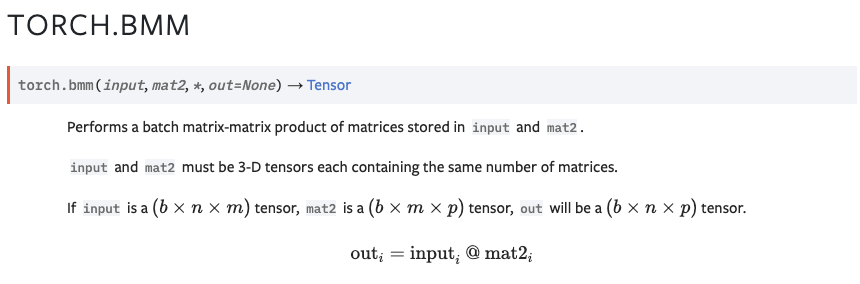

In [23]:
scores = torch.bmm(query,key.transpose(1,2)) / sqrt(dim_k)
scores.size()


torch.Size([1, 5, 5])

In [24]:
scores

tensor([[[26.8164,  1.1377, -1.6683,  1.5390, -1.2212],
         [ 1.1377, 29.8078,  0.2574,  1.3068, -0.0643],
         [-1.6683,  0.2574, 28.3667,  1.4215, -0.5123],
         [ 1.5390,  1.3068,  1.4215, 29.0260, -0.4090],
         [-1.2212, -0.0643, -0.5123, -0.4090, 26.0834]]],
       grad_fn=<DivBackward0>)

Notice that the diagonal elements have significantly higher values than other elements . WHy ? The items that are most identical is supposed to give larger values and the ones that aren't is supposed to give you a smaller value . Also the posibilities of -ve elements are not there sincce it's just the addition of square of each elements when multiplying by itself but it's not the same when multiplyiong with another embedding vector

In [26]:
import torch.nn.functional as F
weights = F.softmax(scores , dim=-1)
weights

tensor([[[1.0000e+00, 7.0448e-12, 4.2582e-13, 1.0523e-11, 6.6593e-13],
         [3.5380e-13, 1.0000e+00, 1.4671e-13, 4.1897e-13, 1.0635e-13],
         [9.0359e-14, 6.1987e-13, 1.0000e+00, 1.9854e-12, 2.8711e-13],
         [1.1549e-12, 9.1561e-13, 1.0269e-12, 1.0000e+00, 1.6465e-13],
         [1.3861e-12, 4.4077e-12, 2.8161e-12, 3.1225e-12, 1.0000e+00]]],
       grad_fn=<SoftmaxBackward0>)

In [27]:
weights.sum(dim=-1)

tensor([[1., 1., 1., 1., 1.]], grad_fn=<SumBackward1>)

weights = [1,5,5] (Containing Embedding @ Embedding.T)
value = [1,5,768] ( Containing the original embeddings )

attn_outputs = weights @ value = [1,5,768] which has the same size as the original matrix


In [28]:
attn_outputs = torch.bmm(weights,value)
attn_outputs.size()

torch.Size([1, 5, 768])

To wrap this all in a single function 

In [29]:
def scalar_dot_product( query , key , value ):
  
  dim_k = query.size(-1)
  scores = torch.bmm(query , key.transpose(1,2)) / sqrt(dim_k)
  weights = F.softmax(scores , dim=-1)
  return torch.bmm(weights,value)



Our attention mechanism with equal query and key vectors will assign a very large score to identical words in the context, and in particular to the current word itself: the dot product of a query with itself is always 1. But in practice, the meaning of a word will be better informed by complementary words in the context than by identical words—for example, the meaning of “flies” is better defined by incorporating information from “time” and “arrow” than by another mention of “flies”. How can we promote this behavior?

### Multi-headed Attention